In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

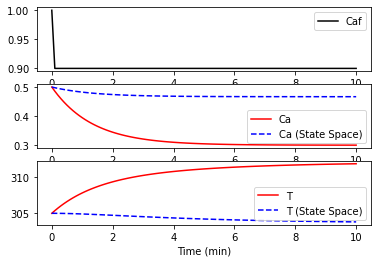

In [10]:
# Define State Space Model
# (u) are inputs
#  u[0] = Caf
#  u[1] = Tf
# States = x
# Outputs = y
#  x[0] = y[0] = Ca
#  x[1] = y[1] = T
# dx/dt = A * x + B * u
#     y = C * x + D * u
# Equations
# H = 20 J/moles
# rA = 0.5 * Ca
# V * dCa/dt = qf*Caf - q*Ca - rA*V
# V * dT/dt  = qf*Tf - q*T + H*rA*V
# Substituting given values
# dCa/dt = 0.25*(Caf - Ca) - 0.5*Ca
# dT/dt  = 0.25*(Tf  - T) + 10.0*Ca
# Define matrices for state space
n = 2
m = 1
p = 2
A = np.zeros((n,n))
B = np.zeros((n,m))
# Linearized equation non-zero elements
A[0,0] = -0.75
B[0,0] = 0.25
A[1,0] = 10.0
A[1,1] = -0.25

# Matrices for outputs
C = np.eye(n)
D = np.zeros((p,m))
# Define state space model
sys = signal.StateSpace(A,B,C,D)
# Step of 1.0 to 10 min
t = np.linspace(0,10,101)
t_sys,y_sys = signal.step(sys,T=t)
# Step of -0.1
y_sys = -0.1 * y_sys
# Add steady state values
Ca0 = 0.5
T0 = 305.0
Ca_sys = y_sys[:,0] + Ca0
T_sys = y_sys[:,1] + T0


# Plot the inputs and results
plt.figure()

plt.subplot(3,1,1)
Caf[0] = 1.0
plt.plot(t,Caf,'k-',label='Caf')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(t,Ca,'r-',label='Ca')
plt.plot(t_sys,Ca_sys,'b--',label='Ca (State Space)')
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(t,T,'r-',label='T')
plt.plot(t_sys,T_sys,'b--',label='T (State Space)')
plt.legend(loc='best')
plt.xlabel('Time (min)')
plt.savefig('CSTR Modelling')
plt.show()